# Bay Area GoBike Analysis
Sullivan Swift

- Python
    - Libraries used: pandas, matplotlib
    - Jupyter Notebook
- SQL
- Google BigQuery
- Data Analysis

---

## Table of Contents

1. Introduction
    + 1.1 Dataset Information
    + 1.2 Important Definitions
2. Key Findings
3. Recommendations
4. Detailed Findings
5. Appendix
---

## 1. Introduction
Ford GoBike runs a Bay Area Bikeshare. Their current offerings for bikeshare services include:

* Single Trip: a flat price for a single one-way trip
* Day Pass: a day pass that allows unlimited 30-minute rides for 24 hours 
* Annual Membership: an annual membership

To assist with GoBike's goal of increasing membership, we pulled their San Francisco Bikeshare dataset through Google BigQuery. We analyzed these data to define what the current customer base looks like, in terms of subscriber type and popular trips, and identify possible opportunities to increase membership. 

### 1.1 Dataset Information:

** Year Ranges: **
* 2013: End of August through December (4 months)
* 2014: January through December (12 months)
* 2015: January through December (12 months)
* 2016: January through end of August (8 months)

*Note: 2013 and 2016 do not contain data for the full year. Data for those years may not accurately represent ridership.*
    
### 1.2 Important Definitions:

**Subscriber**: Annual or 30-day member

**Customer**: 24-hour or 3-day member

**Trip**: A trip refers to a one-way trip. E.g.,

start_station_name|end_station_name
---|---
San Francisco Caltrain 2 (330 Townsend)|Townsend at 7th

**Route**: A route refers to two trips that create a 'round trip'. E.g.,

start_station_name|end_station_name
---|---
San Francisco Caltrain 2 (330 Townsend)|Townsend at 7th
Townsend at 7th|San Francisco Caltrain 2 (330 Townsend)

**Commuter Route**: Trips beginning between 5AM and 9AM that have a counterpart trip beginning between 3PM and 7PM. For more detail, see Section 3.1 below.

## 2. Key Findings

* **Ridership is down in 2016.**

Figure 1


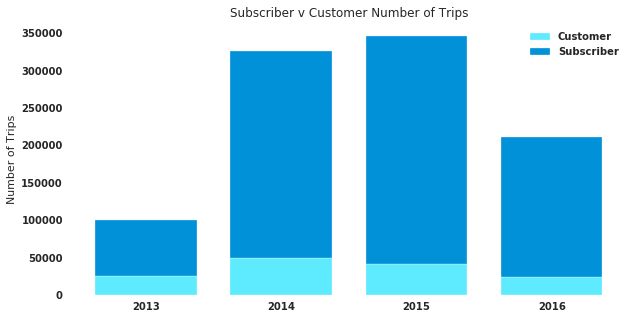

In [575]:
print('Figure 1')
tripcount

The number of trips for 2016 seems low, even considering only the first eight months of the year.

Figure 2


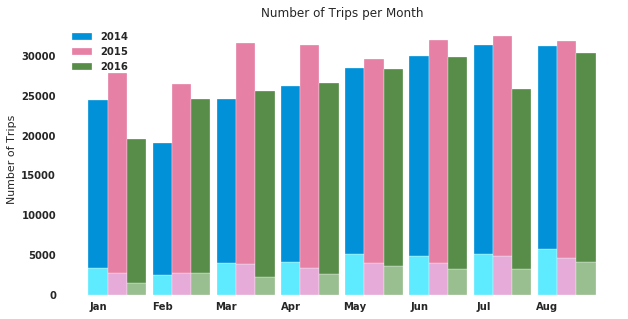

In [576]:
print('Figure 2')
tripcount_sub

Comparing by month, we see the first eight months of 2016 have consistently fewer trips compared to 2014 and 2015 for both Subscribers and Customers.

Figure 3


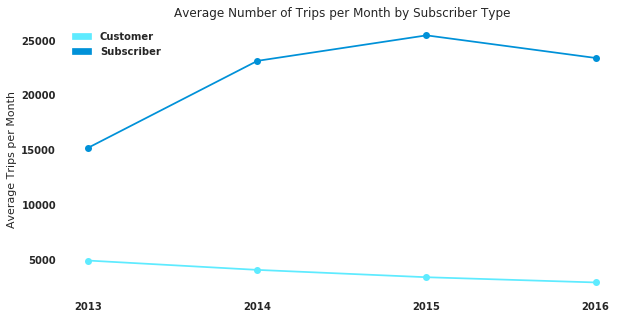

In [577]:
print('Figure 3')
monthly_avg

The monthly average number of trips is down for both Subscribers and Customers in 2016. The average number of trips per month for Customers has been decreasing since 2013.

* **Customers appear to use the bikes for longer, one-off trips and Subscribers for many, shorter trips.**

Figure 4


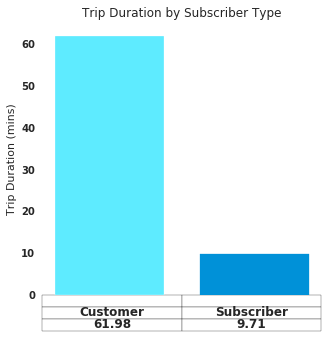

In [578]:
print('Figure 4')
trip_dur

The average Customer trip is just over an hour long, six times the length of the average Subscriber trip. This indicates very different uses of the bikes between Subscribers and Customers.

The Figure 3 above shows that Subscribers make substantially more trips that Customers.

* **There is no overlap between the Top 10 routes for Subscribers and Customers**

In [579]:
print('Table 2')
print('Popular Trips for Subscribers')
pop_trips_s.head(10)

Table 2
Popular Trips for Subscribers


,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Subscriber,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8305,4.944471
1,Subscriber,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6931,8.613194
2,Subscriber,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6641,4.222153
3,Subscriber,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6332,9.757660
4,Subscriber,Embarcadero at Sansome,Steuart at Market,6200,6.656142
5,Subscriber,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6158,10.759971
6,Subscriber,Steuart at Market,2nd at Townsend,5758,9.082008
7,Subscriber,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),5709,11.819411
8,Subscriber,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),5699,10.849199
9,Subscriber,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5695,11.836520


The popular trips for Subscribers contain routes. For example:

|start_station_name|end_station_name|count|duration_min
---|---|---|---|---
0|San Francisco Caltrain 2 (330 Townsend)|Townsend at 7th|8305|4.944471
2|Townsend at 7th|San Francisco Caltrain 2 (330 Townsend)|6641|4.222153

This is likely indicitive of daily, Commuter Routes.

In [580]:
print('Table 3')
print('Popular Trips for Customers')
pop_trips_c.head(10)

Table 3
Popular Trips for Customers


,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Customer,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3667,38.064249
1,Customer,Embarcadero at Sansome,Embarcadero at Sansome,2545,78.736778
2,Customer,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),2004,113.374617
3,Customer,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1638,27.985470
4,Customer,Embarcadero at Vallejo,Embarcadero at Sansome,1345,44.588364
5,Customer,University and Emerson,University and Emerson,1113,148.809898
6,Customer,Harry Bridges Plaza (Ferry Building),Embarcadero at Vallejo,868,55.840323
7,Customer,Steuart at Market,Embarcadero at Sansome,847,41.784514
8,Customer,Market at 4th,Market at 4th,811,155.692458
9,Customer,Market at 4th,Embarcadero at Sansome,770,58.711991


Customer trips are quite different: Four of the top ten trips are begin and end at the same station and last more than an hour.

There isn't any overlap between the top ten Subscriber and Customer trips.

* **The 3 most popular trips of all time are also Commuter Routes**

In [631]:
all_time_pop_trips.head(3)

,start_station_name,end_station_name,count,duration_min
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150,19.800064
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508,5.111099
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620,9.695914


In [671]:
commuter_routes.ix[[2,16,1]]

,route,morning_count,morning_dur,mmorning,evening_count,evening_dur,emorning
2,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,9.941606,True,2360,12.152408,False
16,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,4.576950,True,3856,4.340552,False
1,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,9.525496,True,5230,8.376775,False


* **The Top 20 Commuter Routes make up nearly 13% of total trips**

In [637]:
print('Figure 5')
print('Total Top 20 Commuter Trips: %i' %(sum(commuter_routes['morning_count'])+sum(commuter_routes['evening_count'])))
print('Total Trips: %i' %983648)
print('Percent Top 20 Commuter Trips: %1.1f%%' %(prop*100))

Total Top 20 Commuter Trips: 125072
Total Trips: 983648
Percent Top 20 Commuter Trips: 12.7%


* **All of the Top 20 Commuter Routes are also in the top Subscriber Trips**

In [655]:
print('Table 7')
print('Subscriber Trip-Commuter Route Overlap')
print('Number of overlapping routes:', commuter_routes_sub.shape[0])
commuter_routes_sub

Table 7
Subscriber Trip-Commuter Route Overlap
Number of overlapping routes: 20


,route,morning_count,morning_dur,mmorning,evening_count,evening_dur,emorning,s_count,s_dur,s_morning
0,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,9.525496,True,5230,8.376775,False,4787,9.471450,True
1,San Francisco Caltrain (Townsend at 4th) : Tem...,3856,11.690059,True,4147,11.188831,False,3817,11.430744,True
2,Steuart at Market : 2nd at Townsend,3840,8.615043,True,2743,9.427622,False,3789,8.574593,True
3,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,4.576950,True,3856,4.340552,False,3575,4.560821,True
4,San Francisco Caltrain (Townsend at 4th) : Emb...,3626,10.446861,True,4933,10.977178,False,4817,10.501993,False
5,San Francisco Caltrain (Townsend at 4th) : Har...,3322,12.120364,True,2591,14.534343,False,3246,11.764346,True
6,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,9.941606,True,2360,12.152408,False,2822,6.876116,True
7,San Francisco Caltrain (Townsend at 4th) : Mar...,3006,12.742138,True,2881,11.459898,False,2946,12.721662,True
8,Market at Sansome : 2nd at South Park,2982,5.981707,True,3802,7.861945,False,3722,7.586329,False
9,San Francisco Caltrain (Townsend at 4th) : Ste...,2920,12.038573,True,4124,12.199030,False,3998,11.947374,False


## 3. Recommendations

In order to attract more Customers, Ford GoBike should consider the following:

* **Adjust the Day Pass**: Increase ride time to have more appeal for Customers
    * Since the average trip is about 60-minutes, the 30-minute ride time could be increased to 45- or 60-minutes.
* **Cater to Commuters**: Offer a cheaper membership option with a shorter ride time or specific Commuter Routes
    * Commuters are consistently at the same stations, and their trips tend to be under 15-minutes.
* **Reserve a Bike**: Allow Subscribers / Commuters to reserve bikes during a time period (e.g., 15- or 30-minute window), giving Commuters the peace of mind that they will have a bike when they need it
* **Tour Pass**: Create an offer for a 60- or 90- minute period of time that must start and end at the same station or a particular set of 'tour' stations
    * Three of the most popular Customer trips start and end at the same station and tend to be longer than one hour.
* **Route Specials**: Offer specials between specific routes, such as popular Commuter Routes

## 4. Detailed Findings and Code

In [668]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [657]:
# Global variables
# Plot colors
customer_color = '#5eebff'
subscriber_color = '#0091d8'

### 1. Subscriber Type Analysis

#### 1.1 Number of Subscribers v Customers
```sql
#standardSQL
SELECT subscriber_type, COUNT(*) count,
EXTRACT(YEAR FROM start_date) year
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY subscriber_type, year
ORDER BY subscriber_type, year, count
```

This query pulls the number of trips made by Subscribers and Customers by year.

In [658]:
# Subscriber/Customer Trip Counts
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, count(*) count, EXTRACT(YEAR from start_date) year FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, year ORDER BY subscriber_type, year, count' > sub_type_count_over_time.csv
sub_count = pd.read_csv('sub_type_count_over_time.csv')

Waiting on bqjob_r3be7e28ddde8eea4_000001641112a322_1 ... (0s) Current status: DONE   

The code below organizes the data for the plots.

In [659]:
# Customer data
cbar_data = sub_count['count'].loc[sub_count['subscriber_type'] == 'Customer']

# Subscrber data
sbar_data = sub_count['count'].loc[sub_count['subscriber_type'] == 'Subscriber']

The code below creates a stacked bar chart of the data.

Figure 1


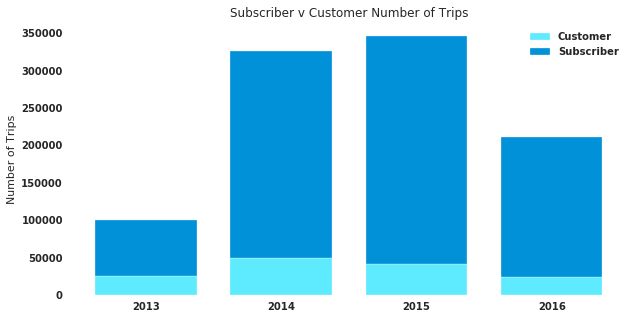

In [660]:
# Create a stacked bar chart of number of trip by subscriber type year over year
# Position of the bars
ticks = np.arange(4)

# x axis labels
years = range(2013, 2017)

# Create te figure and axis for the graphs
tripcount, ax_tc = plt.subplots(figsize=(10,5))
barWidth = .75

# Create the bars for the Customers
cbar = ax_tc.bar(ticks, cbar_data, color=customer_color, edgecolor='white', width=barWidth)

# Create the bars for the Subscribers
sbar = ax_tc.bar(ticks, sbar_data, color=subscriber_color, edgecolor='white', width=barWidth, bottom=cbar_data)

# set the labels and title
ax_tc.set_xticks(ticks)
ax_tc.set_xticklabels(years)
ax_tc.set_ylabel('Number of Trips')
ax_tc.set_title('Subscriber v Customer Number of Trips')
ax_tc.set_facecolor('white')

# Add a legend
ax_tc.legend((cbar[0], sbar[0]), ('Customer', 'Subscriber'))

print('Figure 1')
plt.show()

*Note that 2013 only contains data from the end of August 2013 through December 2013 and 2016 only contains data from Janary 2016 through August 2016, while 2014 and 2015 are full years.*

| 2013 | 2014 | 2015 | 2016 | Total
---|---|---|---|---|---
Customer | 24,499 | 48,576 | 40,530 | 23,204 | 136,809
Subscriber | 76,064 | 277,763 | 305,722 | 187,290 | 846,839
Total | 100,563 | 326,339 | 346,252 | 210,494 | 983,648

Ridership had been increasing from 2013 to 2015, however 2016's ride count seems low for being through most of the year (8 months). To explore this, we looked at the first 8 months of 2014 and 2015 as well as the average number of trips per month for each year.

#### 1.2 Subscriber Type Trip Counts 2014/2015 Through August
```sql
#standardSQL
SELECT subscriber_type, COUNT(*) count, 
EXTRACT(MONTH FROM start_date) month,
EXTRACT(YEAR FROM start_date) year 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY subscriber_type, year, month
ORDER BY subscriber_type, year, month, count
```

This query pulls the count of trips for each month and year.

In [661]:
# 2014 and 2015 Subscriber/Customer Trip Counts through August
# Get and save the data by month and year
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, COUNT(*) count, EXTRACT(MONTH FROM start_date) month, EXTRACT(YEAR FROM start_date) year FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, year, month ORDER BY subscriber_type, year, month, count' > sub_type_count_over_time_month.csv
sub_count_month = pd.read_csv('sub_type_count_over_time_month.csv')

Waiting on bqjob_r7b9ee7bf3fc7b259_000001641112bcd0_1 ... (0s) Current status: DONE   

The code below subsets the data into the first 8 months (January through August) for 2014 and 2015.

In [662]:
sub_2014 = sub_count_month.loc[sub_count_month['year'] == 2014]
sub_2015 = sub_count_month.loc[sub_count_month['year'] == 2015]
sub_2016 = sub_count_month.loc[sub_count_month['year'] == 2016]

m_2014 = sub_2014.loc[sub_2014['month'] < 9]
m_2015 = sub_2015.loc[sub_2015['month'] < 9]
m_2016 = sub_2016.loc[sub_2016['month'] < 9] # for consistency

# Total Customer trips per month
ccnt_2014 = m_2014['count'].loc[m_2014['subscriber_type']=='Customer']
ccnt_2015 = m_2015['count'].loc[m_2015['subscriber_type']=='Customer']
ccnt_2016 = m_2016['count'].loc[m_2016['subscriber_type']=='Customer']

# Total Subscriber trips per month
scnt_2014 = m_2014['count'].loc[m_2014['subscriber_type']=='Subscriber']
scnt_2015 = m_2015['count'].loc[m_2015['subscriber_type']=='Subscriber']
scnt_2016 = m_2016['count'].loc[m_2016['subscriber_type']=='Subscriber']

# Total number of trips per month
total_2014 = [ cc + sc for cc,sc in zip(ccnt_2014, scnt_2014) ]
total_2015 = [ cc + sc for cc,sc in zip(ccnt_2015, scnt_2015) ]
total_2016 = [ cc + sc for cc,sc in zip(ccnt_2016, scnt_2016) ]

The code below plots the first 8 months of data for 2014 - 2016.

Figure 2


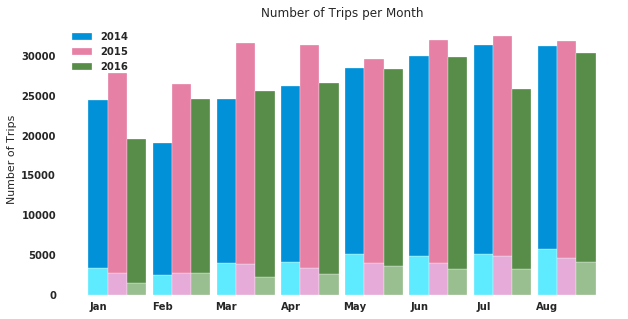

In [588]:
ticks = range(1,9)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

# Create te figure and axis for the graphs
tripcount_sub, ax_sub = plt.subplots(figsize=(10,5))
barWidth = .3

# Create the bars
cbar_2014 = ax_sub.bar(ticks, ccnt_2014, color=customer_color, edgecolor='white', width=barWidth)
sbar_2014 = ax_sub.bar(ticks, scnt_2014, color=subscriber_color, edgecolor='white', width=barWidth, bottom=ccnt_2014)

cbar_2015 = ax_sub.bar([t+barWidth for t in ticks], ccnt_2015, color='#e7abd9', edgecolor='white', width=barWidth)
sbar_2015 = ax_sub.bar([t+barWidth for t in ticks], scnt_2015, color='#e780a5', edgecolor='white', width=barWidth, bottom=ccnt_2015)

cbar_2016 = ax_sub.bar([t+barWidth*2 for t in ticks], ccnt_2016, color='#99be8f', edgecolor='white', width=barWidth)
sbar_2016 = ax_sub.bar([t+barWidth*2 for t in ticks], scnt_2016, color='#578c49', edgecolor='white', width=barWidth, bottom=ccnt_2016)


# set the labels and title
ax_sub.set_xticks(ticks)
ax_sub.set_xticklabels(months)
ax_sub.set_ylabel('Number of Trips')
ax_sub.set_title('Number of Trips per Month')
ax_sub.set_facecolor('white')

# Add a legend
ax_sub.legend((sbar_2014[0], sbar_2015[0],sbar_2016[0]), ('2014', '2015', '2016'))

print('Figure 2')
plt.show()

The number of trips per month in 2016 is consistently below the number of trips per month for 2015 and below all but one month of 2014. This further supports that ridership has likely decreased for 2016. Both Customer and Subscriber trips are like this.

The code below organizes the data for the monthly average.

#### 1.3  Average number of monthly trips by Subscribers v Customers
```sql
#standardSQL
SELECT subscriber_type, count(*) count,
EXTRACT(MONTH FROM start_date) month,
EXTRACT(YEAR FROM start_date) year
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY subscriber_type, year, month
ORDER BY subscriber_type, year, month
```

This query pulls the number of trips by subscriber type for each month and year.

In [589]:
# Number of trips by month/year, by Subscriber/Customer
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, count(*) count, EXTRACT(MONTH FROM start_date) month, EXTRACT(YEAR FROM start_date) year FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, year, month ORDER BY subscriber_type, year, month' > monthly_trip_count_by_year.csv
monthly_count = pd.read_csv('monthly_trip_count_by_year.csv')

Waiting on bqjob_r430c2fc17ed8615d_0000016410ebaba8_1 ... (1s) Current status: DONE   

The code below creates number of trips per month averages for each year by subscriber type so they may be plotted below. 

In [590]:
# Calculate the average number of trips per month for each year, for Subscribers and Customers

#Customers
c = monthly_count.loc[monthly_count['subscriber_type'] == 'Customer']
c_avgs = []
for y in years:
    temp = c.loc[c['year'] == y]
    c_avgs.append(sum(temp['count']/temp.shape[0]))

# Subscribers
s = monthly_count.loc[monthly_count['subscriber_type'] == 'Subscriber']
s_avgs = []
for y in years:
    temp = s.loc[s['year'] == y]
    s_avgs.append(sum(temp['count']/temp.shape[0]))

The code below creates a line chart of the data, making use of the averages above.

Figure 3


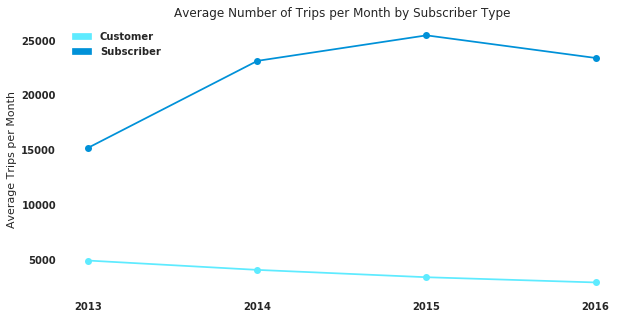

In [591]:
monthly_avg, ax_ma = plt.subplots(figsize=(10,5))

ax_ma.plot(years, c_avgs, color=customer_color, marker='o')
ax_ma.plot(years, s_avgs, color=subscriber_color, marker='o')

ax_ma.set_facecolor('white')

x_lab=['', '2013', '', '2014', '', '2015', '', '2016']
    
ax_ma.set_xticklabels(x_lab)
ax_ma.set_ylabel('Average Trips per Month')
ax_ma.set_title('Average Number of Trips per Month by Subscriber Type')
ax_ma.legend((cbar[0], sbar[0]), ('Customer', 'Subscriber'))

print('Figure 3')
plt.show()

The average number of trips per month for subscribers increased from 2013 to 2015 and decreased some in the first eight months of 2016. Customer trips started off low and have decreased slightly over time. The lower average of trips per month further indicates ridership is down in 2016.

#### 1.4 Trip Duration by Subscriber Type
```sql
#standardSQL
SELECT subscriber_type,
AVG(duration_sec)/60 duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY subscriber_type
ORDER BY subscriber_type
```

This query pulls the average duration of trips in minutes by subscriber type.

In [592]:
# Average length of popular Subscriber/Customer trips
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type ORDER BY subscriber_type' > avg_trip_len.csv
avg_trip = pd.read_csv('avg_trip_len.csv')

Waiting on bqjob_r6d1ffb2b7297074f_0000016410ebc2d5_1 ... (0s) Current status: DONE   

The cod below organizes the data to be plotted and plots it.

Figure 4


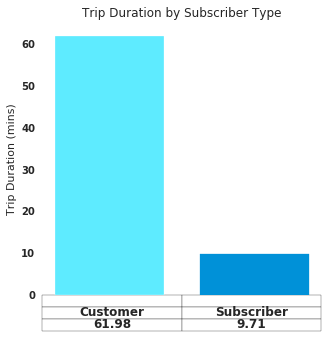

In [593]:
# Create te figure and axis for the graphs
trip_dur, ax_td = plt.subplots(figsize=(5,5))
barWidth = .75

# Create the bars for the Customers
bar = ax_td.bar(avg_trip['subscriber_type'], avg_trip['duration_min'], color=customer_color, edgecolor='white', width=barWidth)
bar[1].set_color(subscriber_color)

cell_text = [
    ['Customer', 'Subscriber'],
    ['%1.2f' %d for d in avg_trip['duration_min']]
 ]

# Add a table at the bottom of the axes
trip_dur_table = plt.table(cellText=cell_text,
                      colLabels=['', ''],
                      cellLoc='center',
                      loc='bottom')

# set the labels and title
ax_td.set_xticks([])
ax_td.set_ylabel('Trip Duration (mins)')
ax_td.set_title('Trip Duration by Subscriber Type')
ax_td.set_facecolor('white')

print('Figure 4')
plt.show()

Customer trips tend to be much longer than Subscriber trips, indicating different uses of the bikes for each subscriber type. Customers appear to use the bikes for longer, one-off trips and Subscribers for many, shorter trips.

### 2. Routes Analysis

### 2.1 Popular trips of all time
```sql
#standardSQL
SELECT start_station_name, end_station_name, COUNT(*) count
AVG(duration_sec)/60 duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_station_name, end_station_name
ORDER BY count DESC
LIMIT 25
```

This query pulls the start and end station name of the 25 highest frequency (most popular) trips from 2013 to 2016.

In [625]:
# Average length of popular Subscriber/Customer trips
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY count DESC LIMIT 25' > all_time_pop_trips.csv
all_time_pop_trips = pd.read_csv('all_time_pop_trips.csv')

Waiting on bqjob_r1b852720397ccc35_0000016410f67dbf_1 ... (0s) Current status: DONE   

In [627]:
# Display the table
print('Table 1')
print('Most Popular Trips')
all_time_pop_trips.head(10)

Table 1
Most Popular Trips


,start_station_name,end_station_name,count,duration_min
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150,19.800064
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508,5.111099
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620,9.695914
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888,10.625387
4,Embarcadero at Sansome,Steuart at Market,6874,8.516817
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6836,4.652019
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6351,11.628893
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),6215,13.283374
8,Steuart at Market,2nd at Townsend,6039,9.586209
9,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5959,12.173340


The most popular trips have start and end stations in common and are short trips, indicating the possibility of regular or daily trips being made.

#### 2.2 Popular Trips by Subscriber Type

##### 2.2.1 Popular Trips for Subscribers
```sql
#standardSQL
SELECT subscriber_type, 
start_station_name, 
end_station_name, 
COUNT(*) count, 
AVG(duration_sec)/60 duration_min 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY subscriber_type, start_station_name, end_station_name 
ORDER BY subscriber_type DESC, count DESC 
LIMIT 25
```

This query pulls the 25 most popular trips and their durations for Subscribers.

In [596]:
# Popular trips for Subscribers
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, start_station_name, end_station_name ORDER BY subscriber_type DESC, count DESC LIMIT 25' > pop_trips_s.csv
pop_trips_s = pd.read_csv('pop_trips_s.csv')

Waiting on bqjob_r46bcc27ace4c8e3e_0000016410ebdd5b_1 ... (0s) Current status: DONE   

In [597]:
# Display the table
print('Table 2')
print('Popular Trips for Subscribers')
pop_trips_s.head(10)

Table 2
Popular Trips for Subscribers


,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Subscriber,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8305,4.944471
1,Subscriber,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6931,8.613194
2,Subscriber,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6641,4.222153
3,Subscriber,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6332,9.757660
4,Subscriber,Embarcadero at Sansome,Steuart at Market,6200,6.656142
5,Subscriber,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6158,10.759971
6,Subscriber,Steuart at Market,2nd at Townsend,5758,9.082008
7,Subscriber,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),5709,11.819411
8,Subscriber,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),5699,10.849199
9,Subscriber,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5695,11.836520


The most popular subscriber trips tend to be to and from the same stations and last around ten minutes or less.

##### 2.2.2 Popular Trips for Customers
```sql
#standardSQL
SELECT subscriber_type, 
start_station_name, 
end_station_name, 
COUNT(*) count, 
AVG(duration_sec)/60 duration_min 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY subscriber_type, count DESC 
LIMIT 25
```

This query pulls the 25 most popular trips and their durations for Customers.

In [598]:
# Popular trips for Customers
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, start_station_name, end_station_name ORDER BY subscriber_type, count DESC LIMIT 25' > pop_trips_c.csv
pop_trips_c = pd.read_csv('pop_trips_c.csv')

Waiting on bqjob_r3ad476df16ebeb96_0000016410ebea3b_1 ... (1s) Current status: DONE   

In [599]:
# Display the table
print('Table 3')
print('Popular Trips for Customers')
pop_trips_c.head(10)

Table 3
Popular Trips for Customers


,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Customer,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3667,38.064249
1,Customer,Embarcadero at Sansome,Embarcadero at Sansome,2545,78.736778
2,Customer,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),2004,113.374617
3,Customer,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1638,27.985470
4,Customer,Embarcadero at Vallejo,Embarcadero at Sansome,1345,44.588364
5,Customer,University and Emerson,University and Emerson,1113,148.809898
6,Customer,Harry Bridges Plaza (Ferry Building),Embarcadero at Vallejo,868,55.840323
7,Customer,Steuart at Market,Embarcadero at Sansome,847,41.784514
8,Customer,Market at 4th,Market at 4th,811,155.692458
9,Customer,Market at 4th,Embarcadero at Sansome,770,58.711991


The top ten Customer trips are longer in duration and occassionally start and end at the same station.

#### 2.3 Most Popular Trips by Morning/Evening Rush Hour

##### 2.3.1 Most Popular Morning Trips

```sql
#standardSQL
SELECT start_station_name, end_station_name, COUNT(*) count,
AVG(duration_sec)/60 duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) BETWEEN 5 AND 9
GROUP BY start_station_name, end_station_name
ORDER BY count DESC
LIMIT 25
```
This query pulls the 25 most popular trips during morning rush hour (5AM to 9AM), including trip duration in minutes.

In [600]:
# Average length of popular Subscriber/Customer trips in morning rush hour
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) BETWEEN 5 AND 9 GROUP BY start_station_name, end_station_name ORDER BY count DESC LIMIT 25' > morning_pop_trips.csv

morning_pop_trips = pd.read_csv('morning_pop_trips.csv')

Waiting on bqjob_rdc36bcd2c068bec_0000016410ec0000_1 ... (1s) Current status: DONE   

In [601]:
# Display the table
print('Table 4')
print('Popular Morning Rush Hour Trips')
morning_pop_trips.head(10)

Table 4
Popular Morning Rush Hour Trips


,start_station_name,end_station_name,count,duration_min
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4855,9.525496
1,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3856,11.690059
2,Steuart at Market,2nd at Townsend,3840,8.615043
3,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3629,4.576950
4,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3626,10.446861
5,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3322,12.120364
6,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3153,9.941606
7,San Francisco Caltrain (Townsend at 4th),Market at Sansome,3006,12.742138
8,Market at Sansome,2nd at South Park,2982,5.981707
9,San Francisco Caltrain (Townsend at 4th),Steuart at Market,2920,12.038573


The most popular trips in the morning tend to be short.

##### 2.3.2 Most Popular Evening Trips
```sql
#standardSQL
SELECT start_station_name, end_station_name, COUNT(*) count,
AVG(duration_sec)/60 duration_min
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(HOUR FROM start_date) BETWEEN 15 AND 19
GROUP BY start_station_name, end_station_name
ORDER BY count DESC
LIMIT 25
```
This query pulls the 25 most popular trips during evening rush hour (3PM to 7PM), including trip duration in minutes. 

In [602]:
# Average length of popular Subscriber/Customer trips in evening rush hour
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) BETWEEN 15 AND 19 GROUP BY start_station_name, end_station_name ORDER BY count DESC LIMIT 25' > evening_pop_trips.csv
evening_pop_trips = pd.read_csv('evening_pop_trips.csv')

Waiting on bqjob_r6d560812775127ce_0000016410ec15de_1 ... (1s) Current status: DONE   

In [603]:
# Display the table
print('Table 5')
print('Popular Evening Rush Hour Trips')
evening_pop_trips.head(10)

Table 5
Popular Evening Rush Hour Trips


,start_station_name,end_station_name,count,duration_min
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5230,8.376775
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4933,10.977178
2,Embarcadero at Sansome,Steuart at Market,4631,7.960441
3,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),4147,11.188831
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),4124,12.199030
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),3856,4.340552
6,2nd at South Park,Market at Sansome,3802,7.861945
7,Market at 10th,San Francisco Caltrain 2 (330 Townsend),3674,10.098172
8,Howard at 2nd,San Francisco Caltrain (Townsend at 4th),3303,8.607483
9,Townsend at 7th,Civic Center BART (7th at Market),2987,8.603856


### 3. Commuter Routes

#### 3.1 Define and Identify Commuter Routes

Commuter Routes create a 'round trip', with one direction occuring during morning rush hour (5AM to 9AM) and a counterpart occuring during evening rush hour (3PM to 7PM). The top routes are determined based on the 25 most popular trips during each of these time periods.

The code below creates a standard way of looking at Commuter Routes. The format of a route in the morning is: 

>start_station_name : end_station_name

To form a counterpart to the morning routes, the evening trips' route format is:

>end_station_name : start_station_name

The code below implements these formats. Then we use an inner join on the morning and evening datasets to determine which trips have counterparts.

In [610]:
# Reformat and organize the Commuter Route data
# Create a dict for the new dataframe
routes = {
    'route': [],
    'count': [],
    'dur': [],
    'morning': []
}

# Iterate through the morning and evening popular routes to format them
# Makes use of already pulled data, Morning_pop_trips and evening_pop_trips, above
for i in range(25):
    # Morning trips
    routes['route'].append(morning_pop_trips['start_station_name'].iloc[i] + ' : ' + morning_pop_trips['end_station_name'].iloc[i])
    routes['count'].append(morning_pop_trips['count'].iloc[i])
    routes['dur'].append(morning_pop_trips['duration_min'].iloc[i])
    routes['morning'].append(True)
    
    # Evening trips
    routes['route'].append(evening_pop_trips['end_station_name'].iloc[i] + ' : ' + evening_pop_trips['start_station_name'].iloc[i])
    routes['count'].append(evening_pop_trips['count'].iloc[i])
    routes['dur'].append(evening_pop_trips['duration_min'].iloc[i])
    routes['morning'].append(False)
    
# Turn the dict into a dataframe
routes = pd.DataFrame(routes)

# Split by morning and evening for the merge
morning = routes.sort_values('route').loc[routes['morning']==True]
evening = routes.sort_values('route').loc[routes['morning']==False]
        
# Use an inner join to find the overlapping routes
commuter_routes = pd.merge(morning, evening, how='inner', on=['route'])

# Rename the dataframe's columns
cols = {
    'route':'route',
    'count_x':'morning_count',  
    'dur_x':'morning_dur',  
    'morning_x':'mmorning', 
    'count_y':'evening_count', 
    'dur_y':'evening_dur', 
    'morning_y':'emorning'
}

commuter_routes = commuter_routes.rename(columns=cols)

# Reorder the dataframe's columns
cols = [
    'route',
    'morning_count',  
    'morning_dur',  
    'mmorning', 
    'evening_count', 
    'evening_dur', 
    'emorning'
]

commuter_routes = commuter_routes[cols]

# Sort the routes by popularity
commuter_routes = commuter_routes.sort_values(['morning_count','evening_count'], ascending=False)

In [663]:
# Display the table
print('Table 6')
print('Commuter Routes')
print('Number of routes:', commuter_trips.shape[0])
commuter_routes

Table 6
Commuter Routes
Number of routes: 20


,route,morning_count,morning_dur,mmorning,evening_count,evening_dur,emorning
1,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,9.525496,True,5230,8.376775,False
12,San Francisco Caltrain (Townsend at 4th) : Tem...,3856,11.690059,True,4147,11.188831,False
18,Steuart at Market : 2nd at Townsend,3840,8.615043,True,2743,9.427622,False
16,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,4.576950,True,3856,4.340552,False
7,San Francisco Caltrain (Townsend at 4th) : Emb...,3626,10.446861,True,4933,10.977178,False
8,San Francisco Caltrain (Townsend at 4th) : Har...,3322,12.120364,True,2591,14.534343,False
2,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,9.941606,True,2360,12.152408,False
10,San Francisco Caltrain (Townsend at 4th) : Mar...,3006,12.742138,True,2881,11.459898,False
3,Market at Sansome : 2nd at South Park,2982,5.981707,True,3802,7.861945,False
11,San Francisco Caltrain (Townsend at 4th) : Ste...,2920,12.038573,True,4124,12.199030,False


#### 3.2 Proportion of Commuter Trips

In [656]:
prop = (sum(commuter_routes['morning_count'])+sum(commuter_routes['evening_count']))/983648 # Total trips from 5. Appendix 

print('Figure 5')
print('Total Top 20 Commuter Trips: %i' %(sum(commuter_routes['morning_count'])+sum(commuter_routes['evening_count'])))
print('Total Trips: %i' %983648)
print('Percent Top 20 Commuter Trips: %1.1f%%' %(prop*100))

Figure 5
Total Top 20 Commuter Trips: 125072
Total Trips: 983648
Percent Top 20 Commuter Trips: 12.7%


The Top 20 Commuter Trips make up nearly 13% of total trips.

#### 3.3 Commute Trip Overlap with Most Popular Trips

In [664]:
# Top 3 All Time Popular Routes
all_time_pop_trips.head(3)

,start_station_name,end_station_name,count,duration_min
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150,19.800064
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508,5.111099
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620,9.695914


In [665]:
# Commuter Routes
commuter_routes

,route,morning_count,morning_dur,mmorning,evening_count,evening_dur,emorning
1,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,9.525496,True,5230,8.376775,False
12,San Francisco Caltrain (Townsend at 4th) : Tem...,3856,11.690059,True,4147,11.188831,False
18,Steuart at Market : 2nd at Townsend,3840,8.615043,True,2743,9.427622,False
16,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,4.576950,True,3856,4.340552,False
7,San Francisco Caltrain (Townsend at 4th) : Emb...,3626,10.446861,True,4933,10.977178,False
8,San Francisco Caltrain (Townsend at 4th) : Har...,3322,12.120364,True,2591,14.534343,False
2,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,9.941606,True,2360,12.152408,False
10,San Francisco Caltrain (Townsend at 4th) : Mar...,3006,12.742138,True,2881,11.459898,False
3,Market at Sansome : 2nd at South Park,2982,5.981707,True,3802,7.861945,False
11,San Francisco Caltrain (Townsend at 4th) : Ste...,2920,12.038573,True,4124,12.199030,False


In [666]:
# Top 3 All Time Popular Routes Commuter Route Counterparts
commuter_routes.ix[[2,16,1]]

,route,morning_count,morning_dur,mmorning,evening_count,evening_dur,emorning
2,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,9.941606,True,2360,12.152408,False
16,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,4.576950,True,3856,4.340552,False
1,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,9.525496,True,5230,8.376775,False


The 3 most popular routes are Commuter Routes.

#### 3.4 Identify Overlap between Popular Subsriber Trips and Commuter Routes

Subscribers Top 10 trips included a quite a few 'round trips'. Here we identify how many Subscriber trips qualify as Commuter Routes.

**Popular Morning Subscriber Trips**

```sql
#standardSQL
SELECT subscriber_type, 
start_station_name, 
end_station_name, 
COUNT(*) count, 
AVG(duration_sec)/60 duration_min 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(HOUR FROM start_date) BETWEEN 5 AND 9 
GROUP BY subscriber_type, start_station_name, end_station_name 
ORDER BY subscriber_type DESC, count DESC LIMIT 25' > morning_pop_trips_s.csv
```

In [646]:
# Morning Subscriber Trips
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) BETWEEN 5 AND 9 GROUP BY subscriber_type, start_station_name, end_station_name ORDER BY subscriber_type DESC, count DESC LIMIT 25' > morning_pop_trips_s.csv
morning_pop_trips_s = pd.read_csv('morning_pop_trips_s.csv')

Waiting on bqjob_r4defc0fad7681f51_000001641108438d_1 ... (0s) Current status: DONE   

In [649]:
# Preview the data
morning_pop_trips_s.head(5)

,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Subscriber,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4787,9.471450
1,Subscriber,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3817,11.430744
2,Subscriber,Steuart at Market,2nd at Townsend,3789,8.574593
3,Subscriber,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3603,10.433856
4,Subscriber,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3575,4.560821


**Popular Evening Subscriber Trips**

```sql
#standardSQL
SELECT subscriber_type, 
start_station_name, 
end_station_name, 
COUNT(*) count, 
AVG(duration_sec)/60 duration_min 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(HOUR FROM start_date) BETWEEN 5 AND 9 
GROUP BY subscriber_type, start_station_name, end_station_name 
ORDER BY subscriber_type DESC, count DESC LIMIT 25'
```

In [650]:
# Evening Subscriber Trips
# Get and save the data
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, start_station_name, end_station_name, COUNT(*) count, AVG(duration_sec)/60 duration_min FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR FROM start_date) BETWEEN 15 AND 19 GROUP BY subscriber_type, start_station_name, end_station_name ORDER BY subscriber_type DESC, count DESC LIMIT 25' > evening_pop_trips_s.csv
evening_pop_trips_s = pd.read_csv('evening_pop_trips_s.csv')

Waiting on bqjob_r50b7add0d5131369_000001641108fcea_1 ... (0s) Current status: DONE   

In [651]:
# Preview the data
evening_pop_trips_s.head(5)

,subscriber_type,start_station_name,end_station_name,count,duration_min
0,Subscriber,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4968,8.002868
1,Subscriber,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4817,10.501993
2,Subscriber,Embarcadero at Sansome,Steuart at Market,4272,6.669940
3,Subscriber,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),4081,10.922058
4,Subscriber,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3998,11.947374


In [652]:
# Create a dict for the new dataframe
routes_s = {
    'route': [],
    'count': [],
    'dur': [],
    'morning': []
}

# Iterate through the morning and evening popular routes to format them
for i in range(25):
    # Morning trips
    routes_s['route'].append(morning_pop_trips_s['start_station_name'].iloc[i] + ' : ' + morning_pop_trips_s['end_station_name'].iloc[i])
    routes_s['count'].append(morning_pop_trips_s['count'].iloc[i])
    routes_s['dur'].append(morning_pop_trips_s['duration_min'].iloc[i])
    routes_s['morning'].append(True)
    
    # Evening trips
    routes_s['route'].append(evening_pop_trips_s['end_station_name'].iloc[i] + ' : ' + evening_pop_trips_s['start_station_name'].iloc[i])
    routes_s['count'].append(evening_pop_trips_s['count'].iloc[i])
    routes_s['dur'].append(evening_pop_trips_s['duration_min'].iloc[i])
    routes_s['morning'].append(False)

# Turn the dict into a dataframe
routes_s = pd.DataFrame(routes_s)
routes_s = routes_s.drop_duplicates(subset='route')

In [653]:
# Join on overlap between the Commuter Routes and the Subscriber Trips
commuter_routes_sub = pd.merge(commuter_routes, routes_s, how='inner', on=['route'])

# Turn the dict into a dataframe
routes_s = pd.DataFrame(routes_s)
routes_s = routes_s.drop_duplicates(subset='route')

# Rename the dataframe's columns
cols = {
    'route':'route',
    'count_x':'morning_count',  
    'dur_x':'morning_dur',  
    'morning_x':'mmorning', 
    'count_y':'evening_count', 
    'dur_y':'evening_dur', 
    'morning_y':'emorning',
    'count':'s_count',
    'dur':'s_dur',
    'morning':'s_morning'
}

commuter_routes_sub = commuter_routes_sub.rename(columns=cols)

# Reorder the dataframe's columns
cols = [
    'route',
    'morning_count',  
    'morning_dur',  
    'mmorning', 
    'evening_count', 
    'evening_dur', 
    'emorning',
    's_count',
    's_dur',
    's_morning'
]

commuter_routes_sub = commuter_routes_sub[cols]

# Sort the values
commuter_routes_sub = commuter_routes_sub.sort_values(['morning_count', 'evening_count', 's_count'], ascending=False)

In [667]:
# Display the table
print('Table 7')
print('Subscriber Trip-Commuter Route Overlap')
print('Number of overlapping routes:', commuter_routes_sub.shape[0])
commuter_routes_sub[['route', 'morning_count', 'evening_count', 's_count', 's_morning']]

Table 7
Subscriber Trip-Commuter Route Overlap
Number of overlapping routes: 20


,route,morning_count,evening_count,s_count,s_morning
0,Harry Bridges Plaza (Ferry Building) : 2nd at ...,4855,5230,4787,True
1,San Francisco Caltrain (Townsend at 4th) : Tem...,3856,4147,3817,True
2,Steuart at Market : 2nd at Townsend,3840,2743,3789,True
3,San Francisco Caltrain 2 (330 Townsend) : Town...,3629,3856,3575,True
4,San Francisco Caltrain (Townsend at 4th) : Emb...,3626,4933,4817,False
5,San Francisco Caltrain (Townsend at 4th) : Har...,3322,2591,3246,True
6,Harry Bridges Plaza (Ferry Building) : Embarca...,3153,2360,2822,True
7,San Francisco Caltrain (Townsend at 4th) : Mar...,3006,2881,2946,True
8,Market at Sansome : 2nd at South Park,2982,3802,3722,False
9,San Francisco Caltrain (Townsend at 4th) : Ste...,2920,4124,3998,False


The Top 20 Commuter Routes were also Subscriber Trips. In Table 7 when compare the morning and evening counts to the Subscriber trip counts, we see that Subscriber morning and evening trips account for most of the respective Commuter Trips.

## 5. Appendix

### 5.1 Initial Data Exploration

- **What is the size of the dataset?**

In [293]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(*) total_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r7201f6b2c46abda7_000001640f8617a5_1 ... (0s) Current status: DONE   
+-------------+
| total_trips |
+-------------+
|      983648 |
+-------------+


- **What are the date ranges for the datasets?**

In [502]:
! bq query --use_legacy_sql=FALSE 'SELECT MIN(start_date) firbst_trip, MAX(end_date) last_trip FROM `bigquery-public-data.san_francisco.bikeshare_trips`' 

Waiting on bqjob_r7399ab88d9f00fd2_00000164107e0271_1 ... (1s) Current status: DONE   
+---------------------+---------------------+
|     firbst_trip     |      last_trip      |
+---------------------+---------------------+
| 2013-08-29 09:08:00 | 2016-08-31 23:48:00 |
+---------------------+---------------------+


- **How many bikes are there?**

In [292]:
! bq query --use_legacy_sql=FALSE 'SELECT COUNT(distinct bike(_number) num_bikes FROM `bigquery-public-data.san_francisco.bikeshare_trips`'

Waiting on bqjob_r7bac19108ee04c93_000001640f8597fc_1 ... (0s) Current status: DONE   
+-----------+
| num_bikes |
+-----------+
|       700 |
+-----------+
